<a href="https://colab.research.google.com/github/SmushBall/ML05_Classify_TrafficSigns_Keras_LeNet/blob/main/Classify_Traffic_Signs_using_LE_NET_Keras_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}



In [1]:
#Author: Deepak Kr. Singh
#Date Created: 01/Oct/2020
#Date Modified: 02/Oct/2020
# Case study from Linkedin learning.
# Classify Traffic signs using LE-NET Architecture in Keras using CNN. LE-NET is presented by Yaan LeCun.
# Self Driving cars to detect Traffic Signs. This is an exercise from Udemy Course on Machine Learning.

In [ ]:
import warnings
warnings.filterwarnings("ignore") #This would ignore deprecated warnings raised.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle


In [ ]:
# I am using datataset from my G-Drive. Below code can be used to mount G-Drive to Google Collab.
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
# To check if the files are available in G-Dive. ! can be used to run terminal commands in Google Colab. Also works in jupyter Notebook.
! ls /content/gdrive/My\ Drive/data/Traffic_Signs_Pickled

test.p	train.p  valid.p


In [ ]:
#Pickle in used for serializing and deserializing python object.
#The pickled files are available in my G-Drive. Below code can read from the dataset and deserialize it to python object

train = pickle.load(open('/content/gdrive/My Drive/data/Traffic_Signs_Pickled/train.p','rb'))
test = pickle.load(open('/content/gdrive/My Drive/data/Traffic_Signs_Pickled/test.p','rb'))
validation = pickle.load(open('/content/gdrive/My Drive/data/Traffic_Signs_Pickled/valid.p','rb'))



In [ ]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [ ]:
train.keys() # We have Coordinates, Labels, Features and Sizes available in the dataset.

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [ ]:
train.get('features')

array([[[[ 28,  25,  24],
         [ 27,  24,  23],
         [ 27,  24,  22],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  25],
         [ 31,  27,  26]],

        [[ 29,  26,  25],
         [ 27,  25,  23],
         [ 27,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        [[ 28,  26,  26],
         [ 27,  25,  23],
         [ 26,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        ...,

        [[ 27,  24,  23],
         [ 28,  25,  24],
         [ 30,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 29,  25,  22]],

        [[ 28,  23,  23],
         [ 29,  24,  24],
         [ 31,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 28,  24,  21]],

        [[ 29,  23,  23],
         [ 30,  24,  24],
         [ 32,  24,  23],
         ...,
         [ 27,  24,  22],
        

In [ ]:
train.get('labels') # These are the classified output. 43 classes, ranging from 0 to 42

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [ ]:
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']
x_valid, y_valid = validation['features'], validation['labels']

In [ ]:
x_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape 

(34799,)

4

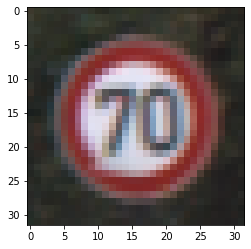

In [ ]:
i = np.random.randint(34799) #Random image among the given dataset
plt.imshow(x_train[i]) #Shown the image
y_train[i] # The output value corresponding to the chosen image

In [ ]:
#Shuffle the dataset
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [ ]:
#Grayscale and Normalize the data
x_train_gray = np.sum(x_train/3, axis = 3, keepdims=True)
x_test_gray = np.sum(x_test/3, axis = 3, keepdims=True)
x_validation_gray = np.sum(x_valid/3, axis = 3, keepdims=True)


In [ ]:
x_train_gray_norm = (x_train_gray - 128) / 128
x_test_gray_norm = (x_test_gray - 128) / 128
x_validation_gray_norm = (x_validation_gray - 128) / 128

In [ ]:
x_train_gray.shape

(34799, 32, 32, 1)

2

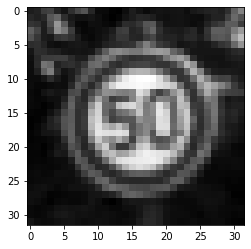

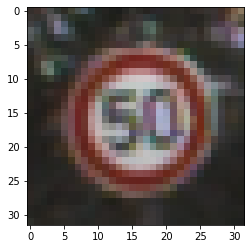

In [ ]:
i = np.random.randint(34799) #Random image among the given dataset
plt.imshow(x_train_gray[i].squeeze(), cmap='gray') # Display the grayscale image
plt.figure()
plt.imshow(x_train[i]) #original image
y_train[i] # The output value corresponding to the chosen image

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, AveragePooling2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [ ]:
cnn_model = Sequential()

#A Sequential model is used when we have exactly one input tensor and one output tensor.

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1))) #better to specify input shape in advance to the model.
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))
cnn_model.add(Dense(units=43, activation='softmax'))



In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [ ]:
history = cnn_model.fit(x_train_gray_norm, y_train, batch_size = 500, epochs = 50, verbose =1, validation_data=(x_validation_gray_norm, y_valid))  

Epoch 1/50
70/70 [==============================] - 12s 176ms/step - loss: 2.9871 - accuracy: 0.2234 - val_loss: 2.6195 - val_accuracy: 0.3100
Epoch 2/50
70/70 [==============================] - 13s 180ms/step - loss: 1.6486 - accuracy: 0.5411 - val_loss: 1.7101 - val_accuracy: 0.5193
Epoch 3/50
70/70 [==============================] - 13s 182ms/step - loss: 1.0378 - accuracy: 0.7154 - val_loss: 1.3210 - val_accuracy: 0.6240
Epoch 4/50
70/70 [==============================] - 13s 180ms/step - loss: 0.7411 - accuracy: 0.8002 - val_loss: 1.0857 - val_accuracy: 0.6794
Epoch 5/50
70/70 [==============================] - 13s 180ms/step - loss: 0.5654 - accuracy: 0.8489 - val_loss: 0.8796 - val_accuracy: 0.7476
Epoch 6/50
70/70 [==============================] - 13s 180ms/step - loss: 0.4270 - accuracy: 0.8948 - val_loss: 0.8555 - val_accuracy: 0.7771
Epoch 7/50
70/70 [==============================] - 13s 179ms/step - loss: 0.3632 - accuracy: 0.9090 - val_loss: 0.8079 - val_accuracy: 0.7819

In [ ]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1176)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               141240    
_________________________________________________________________
dense_4 (Dense)              (None, 84)                10164     
_________________________________________________________________
dense_5 (Dense)              (None, 43)                3655      
Total params: 155,215
Trainable params: 155,215
Non-trainable params: 0
________________________________________________

In [ ]:
score = cnn_model.evaluate(x_test_gray_norm, y_test, verbose =0)

print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8637


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

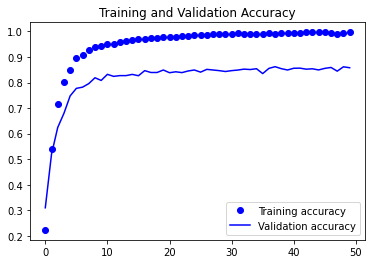

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

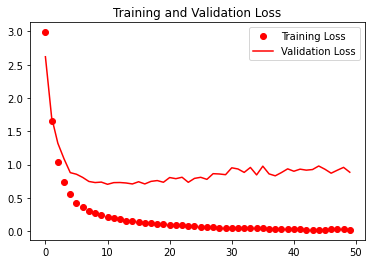

In [ ]:
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes = cnn_model.predict_classes(x_test_gray_norm)
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


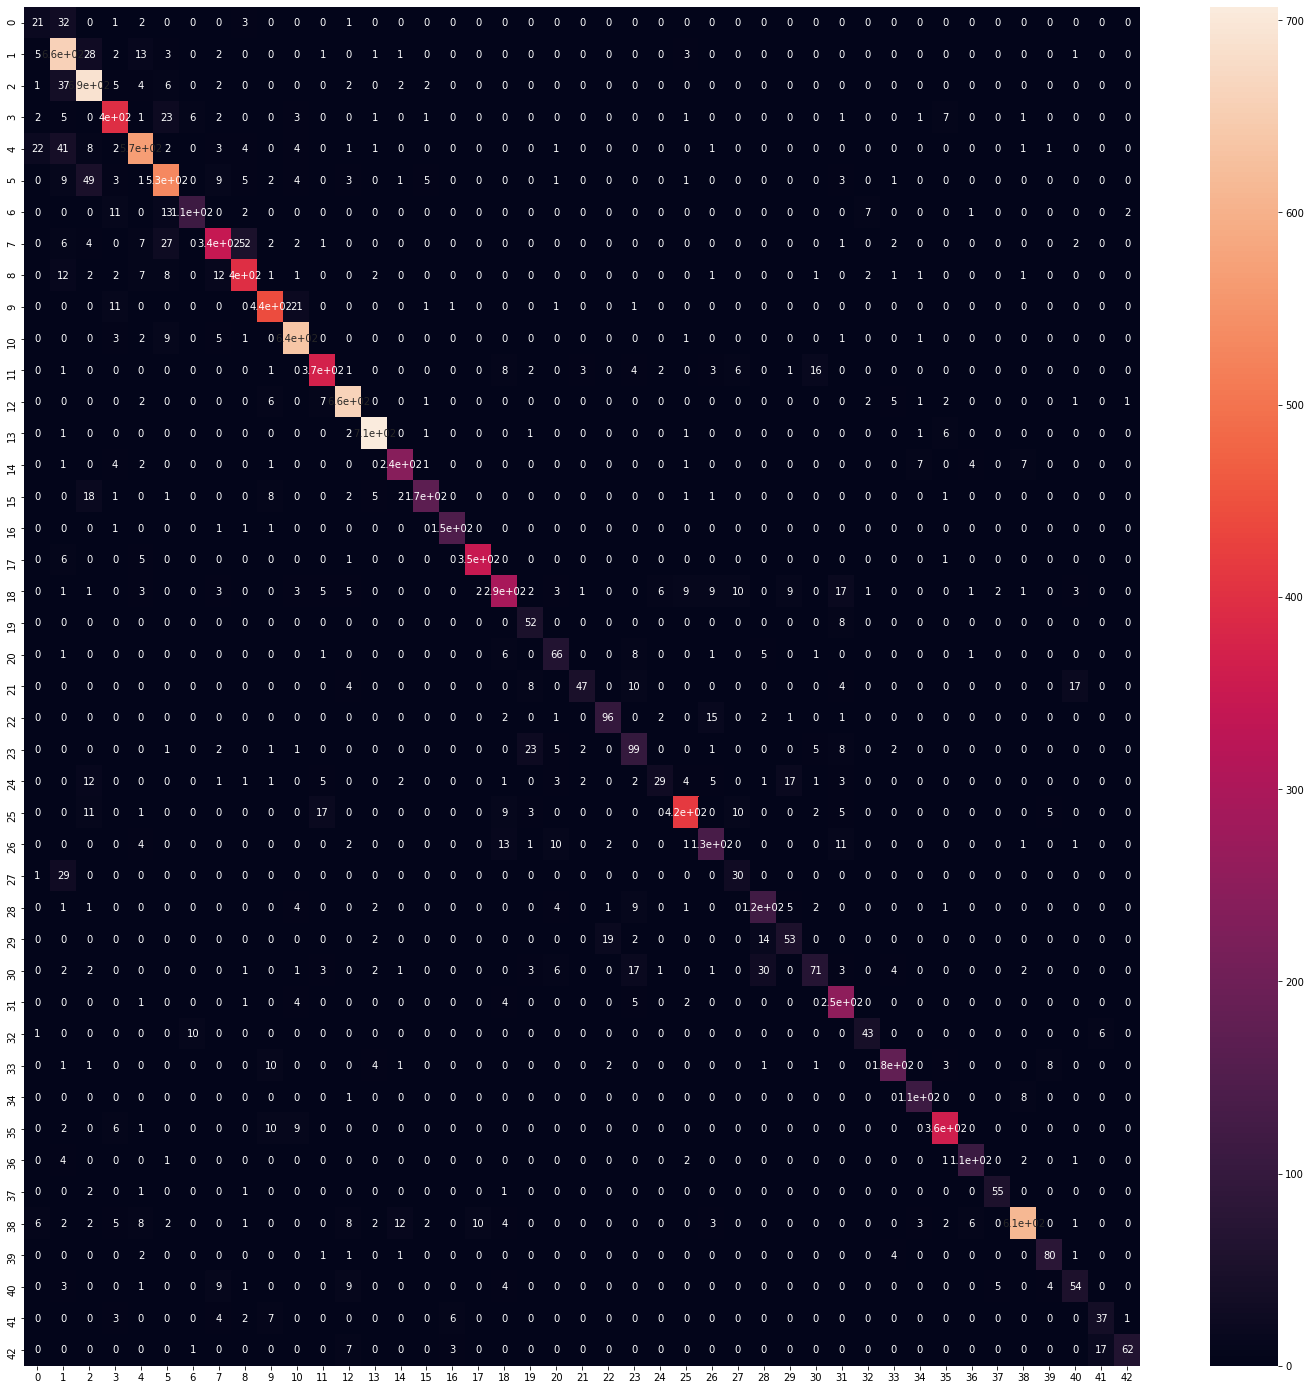

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)

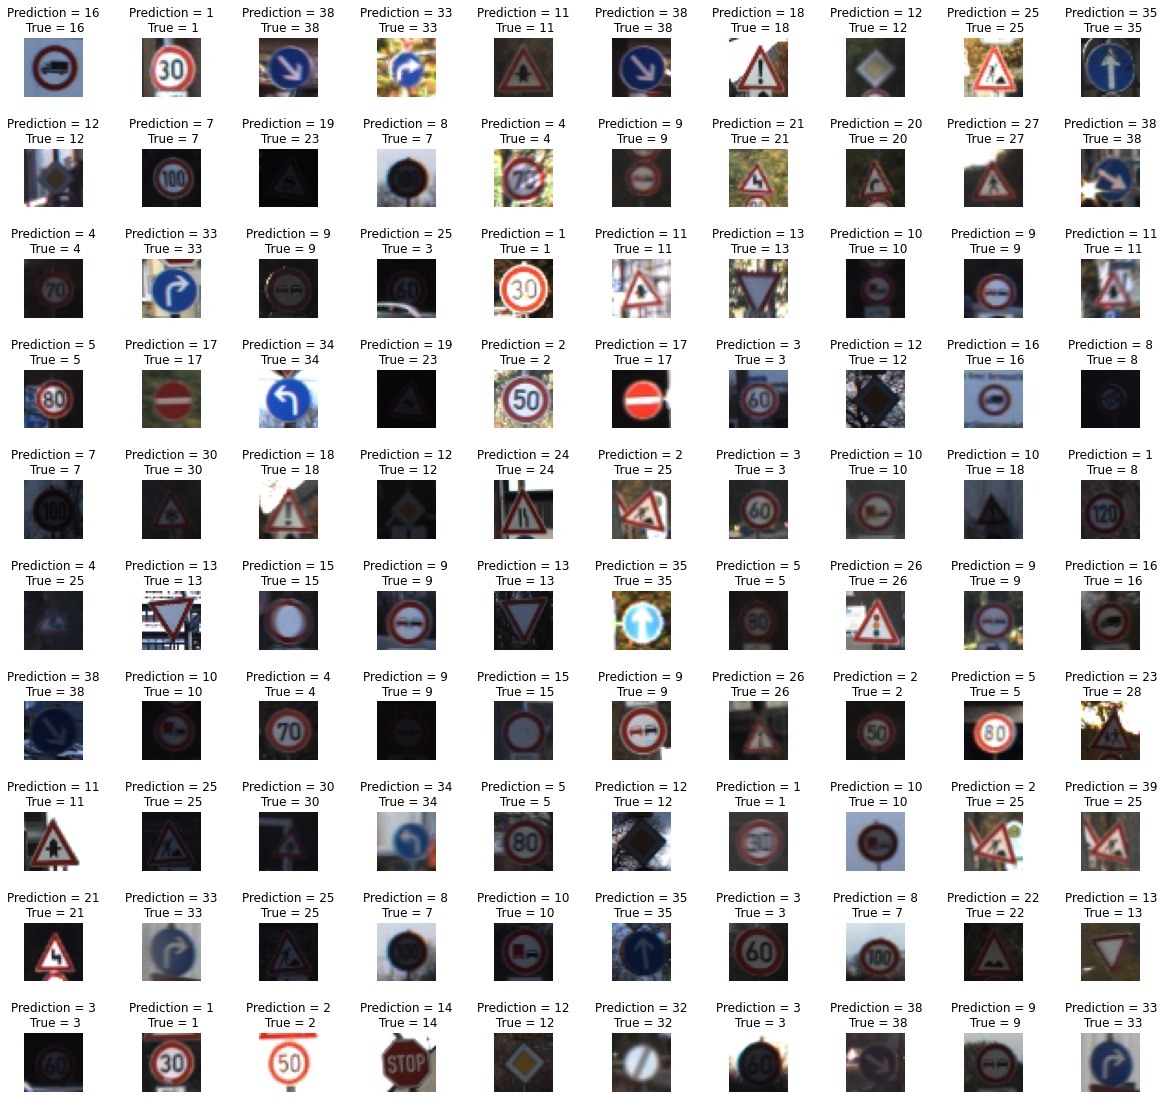

In [ ]:
Length = 10
Width = 10
fig, axes = plt.subplots(Length, Width, figsize = (20,20))
axes = axes.ravel()

for i in np.arange(0, Length * Width):
  axes[i].imshow(x_test[i])
  axes[i].set_title("Prediction = {}\n True = {}".format(predicted_classes[i], y_true[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1)  
